In [177]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Estimate of $p_0$ and $Z$
$p_0 = \frac{\pi\tan{\theta_0}}{c\lambda(B_2-B_1)}$

In [200]:
c = 4.63e14 # T-1 m-2
theta_0 = np.deg2rad(5.5) # rad
wavelength = 2.165e-10 # m
delta_B = 4.68e-3 # T
# Distance between centers of the 2 flippers
L = 2 # m

p_0 = np.pi * np.tan(theta_0) / (c * wavelength * delta_B)
# This is used for numerical stability in the fit
p_inv = 1 / p_0
p_0, p_inv

(0.0006448252299813332, 1550.8078057506352)

In [201]:
z = c * wavelength ** 2 * delta_B * L / (np.pi * np.tan(theta_0))
z

6.714997798900252e-07

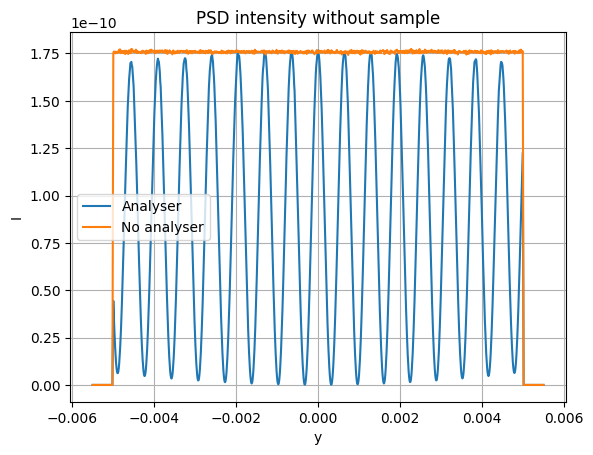

In [202]:
y_flat, I_flat = np.genfromtxt('PSD_no_mod_no_sample.dat', delimiter=' ', usecols=(0,1), unpack=True)
y, I = np.genfromtxt('PSD_mod_no_sample.dat', delimiter=' ', usecols=(0,1), unpack=True)

y*=1e-2
y_flat*=1e-2

plt.plot(y, I, label='Analyser')
plt.plot(y_flat, I_flat, label='No analyser')

plt.xlabel('y')
plt.ylabel('I')
plt.title('PSD intensity without sample')
plt.grid(True)  # Add grid
plt.legend()
plt.show()

[8.77461916e-11 8.60012048e-11 1.55152631e+03 1.05667761e-01]


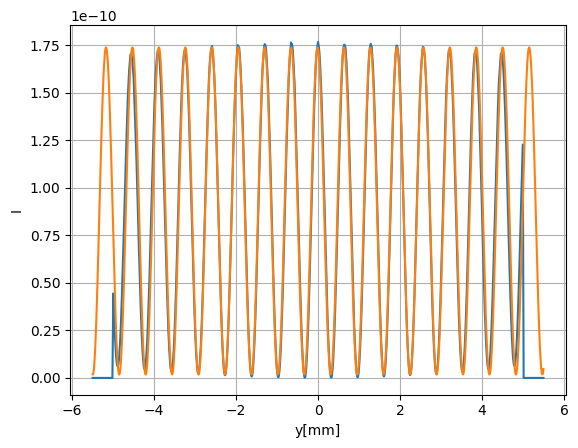

In [203]:
def get_indices_within_range(x, a, b):
    return np.where((x >= a) & (x <= b))[0]

def I_fit(y, a, b, p_inv, phi):
    return (a + b * np.cos(2*np.pi * y * p_inv+phi))
indices = get_indices_within_range(y, -0.004, 0.004)

# The DC component can be expected to be the mean
mean = np.mean(I[indices])
# The amplitude will be roughly the max minus the mean
amplitude = np.max(I[indices]) - mean

# bounds = ([0.7 * mean, 0.7 * amplitude, 0.8*p_inv,0.0], [1.3 * mean, 1.3 * amplitude, 1.2*p_inv,2*np.pi])
guess =  [mean, amplitude, p_inv, 0]
popt, pcov = curve_fit(I_fit, y[indices], I[indices],p0=guess)
print(popt)
I_fitted = I_fit(y,*popt)
plt.plot(y*1e3, I, label='Data')
plt.plot(y*1e3, I_fitted, label='Fit')
plt.xlabel('y[mm]')
plt.ylabel('I')
plt.grid(True)  # Add grid
plt.legend()
plt.show()

In [204]:
I_0 = popt[0]
A_0 = popt[1] / I_0
p_0_fit = 1 / popt[2]
I_0, A_0, p_0_fit

(8.774619163833481e-11, 0.9801132465033954, 0.0006445266162065905)